# Nanodegree Engenheiro de Machine Learning
## Aprendizagem Não Supervisionada
## Projeto 3: Criando Segmentos de Clientela

Bem-vindo ao terceiro projeto do Nanodegree Engenheiro de Machine Learning! Neste Notebook, alguns modelos de código já foram fornecidos e será seu trabalho implementar funcionalidades adicionais necessárias para completar seu projeto com êxito. Seções que começam com **'Implementação'** no cabeçalho indicam que os blocos de código seguintes vão precisar de funcionalidades adicionais que você deve fornecer. As instruções serão fornecidas para cada seção e as especificações da implementação são marcados no bloco de código com um `'TODO'`. Leia as instruções atentamente!

Além de implementar códigos, há perguntas que você deve responder relacionadas ao projeto e a sua implementação. Cada seção na qual você responderá uma questão está precedida de um cabeçalho **'Questão X'**. Leia atentamente cada questão e forneça respostas completas nos boxes seguintes que começam com **'Resposta:'**. O envio do seu projeto será avaliado baseado nas suas respostas para cada uma das questões e na implementação que você forneceu.  

>**Nota:** Células de código e Markdown podem ser executadas utilizando o atalho do teclado **Shift+Enter**. Além disso, células de Markdown podem ser editadas ao dar duplo clique na célula para entrar no modo de edição.

## Começando

Neste projeto, você irá analisar o conjunto de dados de montantes de despesas anuais de vários clientes (reportados em *unidades monetárias*) de diversas categorias de produtos para estrutura interna. Um objetivo deste projeto é melhor descrever a variação de diferentes tipos de clientes que um distribuidor de atacado interage. Isso dará ao distribuidor discernimento sobre como melhor estruturar seu serviço de entrega de acordo com as necessidades de cada cliente.

O conjunto de dados deste projeto pode ser encontrado no [Repositório de Machine Learning da UCI](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). Para efeitos de projeto, os atributos `'Channel'` e `'Region'` serão excluídos da análise – que focará então nas seis categorias de produtos registrados para clientes.

Execute o bloco de código abaixo para carregar o conjunto de dados de clientes da distribuidora, junto com algumas das bibliotecas de Python necessárias exigidos para este projeto. Você saberá que o conjunto de dados carregou com êxito se o tamanho do conjunto de dados for reportado.

In [4]:
# Importe as bibliotecas necessárias para este projeto
import numpy as np
import pandas as pd
from IPython.display import display # Permite o uso de display() para DataFrames
import seaborn as sns
import matplotlib.pyplot as plt

# Importe o código sumplementar para visualização de visuals.py
import visuals as vs

# Mostre matplotlib no corpo do texto (bem formatado no Notebook)
%matplotlib inline

# Carregue o conjunto de dados dos clientes da distribuidora de atacado
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print('Wholesale customers dataset has {} samples with {} features each.'.format(data.shape[0], data.shape[1]))
except:
    print('Dataset could not be loaded. Is the dataset missing?')

Wholesale customers dataset has 440 samples with 6 features each.


## Explorando os Dados
Nesta seção, você vai começar a explorar os dados através de visualizações e códigos para entender como cada atributo é relacionado a outros. Você vai observar descrições estatísticas do conjunto de dados, considerando a relevância de cada atributo, e selecionando alguns exemplos de pontos de dados do conjunto de dados que você vai seguir no decorrer do curso deste projeto.

Execute o bloco de código abaixo para observar as descrições estatísticas sobre o conjunto de dados. Note que o conjunto é compostos de seis categorias importantes de produtos: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'** e **'Delicatessen'** (Perecíveis, Lacticínios, Secos e Molhados, Congelados, Limpeza/Higiene, Padaria/Frios). Considere o que cada categoria representa em termos os produtos que você poderia comprar.

In [5]:
# Mostre a descrição do conjunto de dados
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementação: Selecionando Amostras
Para melhor compreensão da clientela e como seus dados vão se transformar no decorrer da análise, é melhor selecionar algumas amostras de dados de pontos e explorá-los com mais detalhes. No bloco de código abaixo, adicione **três** índices de sua escolha para a lista de `indices` que irá representar os clientes que serão acompanhados. Sugerimos que você tente diferentes conjuntos de amostras até obter clientes que variam significativamente entre si.

In [41]:
# TODO: Selecione três índices de sua escolha que você gostaria de obter como amostra do conjunto de dados
indices = np.random.randint(low = 0, high = 400, size=3)

# Crie um DataFrame das amostras escolhidas
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print ("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3043,1172,1763,2234,217,379
1,27329,1449,1947,2436,204,1333
2,1725,3651,12822,824,4424,2157


In [8]:
for i in indices:
    print(i)

344
54
160


Como *indices* recebe um número randomico, podendo ser alterado quando rodarmos novamente o códico, para este exercício os valores foram: 344, 54, 160

Para melhor visualizar os dados acima, vamos plotar em um gráfico e verificar a diferença por perfil de cliente

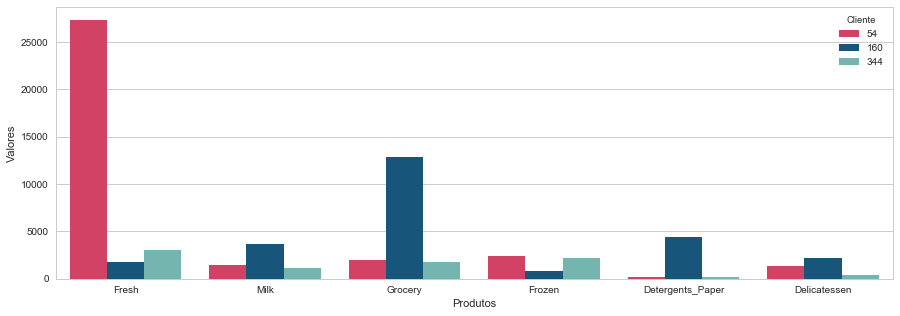

In [9]:
#Alterar nome dos Index da samples para os indices da tabela data e nomear a coluna de indice para Cliente
index = [0, 1, 2]
new_index = [344, 54, 160]
samples= samples.rename(index=dict(zip(index,new_index )))
samples.index.names = ['Cliente']
#Transformar a tabela para que fique uma coluna com os produtos e outras com valores
df = samples.reset_index().melt(var_name='Produtos', value_name='Valores', id_vars='Cliente')
#Plotar o gráfico
palette=['#ea2a58','#06598b', '#69c1b8','#cbe6e7', '#78b343', '#f6dd10']
sns.set(style="whitegrid", palette=palette)
plt.subplots(figsize=(15,5))
sns.barplot(x='Produtos', y='Valores', data=df, hue='Cliente');

### Questão 1
Considere que a compra total de cada categoria de produto e a descrição estatística do conjunto de dados abaixo para a sua amostra de clientes.  
 - Que tipo de estabelecimento (de cliente) cada uma das três amostras que você escolheu representa?

**Dica:** Exemplos de estabelecimentos incluem lugares como mercados, cafés e varejistas, entre outros. Evite utilizar nomes para esses padrões, como dizer *"McDonalds"* ao descrever uma amostra de cliente de restaurante.

**Resposta:**
Perecíveis, Lacticínios, Secos e Molhados, Congelados, Limpeza/Higiene, Padaria/Frios

Eu renomei cada cliente para o nome dos índices da tabela data, para melhor entendimento:

* **Cliente 344**: Devido todos os gastos estarem abaixo da média, apenas *Frozen* tem um gasto um pouco superior comparado ao total, entre 50% a 75%, acredito que seja conveniência de posto de gasolina ou um restaurante de hotel.


* **Cliente 160**: Devido o valor gasto com *Grocery* e *Detergents_Paper* ser maior que a média e os 75% das pessoa que gastam com tal produto, acredito que seja um supermercado. 


* **Cliente 54**: Devido o valor gasto com *Fresh* ser bem maior que a média de gasto com o produto (12.000) e até mesmo acima dos 75% das pessoa que gastam com tal produto, acredito que este cliente é para o setor de varejo para esse tipo de alimentos, no caso uma Hortifruti, ou um restaurante que também utiliza muitos produtos perecíveis. Outro ponto é que seus gastos com os outros produtos são abaixo da média, e Milk e Grocery estão abaixo dos 25%.

### Implementação: Relevância do Atributo
Um pensamento interessante a se considerar é se um (ou mais) das seis categorias de produto são na verdade relevantes para entender a compra do cliente. Dito isso, é possível determinar se o cliente que comprou certa quantidade de uma categoria de produto vai necessariamente comprar outra quantidade proporcional de outra categoria de produtos? Nós podemos determinar facilmente ao treinar uma aprendizagem não supervisionada de regressão em um conjunto de dados com um atributo removido e então pontuar quão bem o modelo pode prever o atributo removido.

No bloco de código abaixo, você precisará implementar o seguinte:
 - Atribuir `new_data` a uma cópia dos dados ao remover o atributo da sua escolha utilizando a função `DataFrame.drop`.
 - Utilizar `sklearn.cross_validation.train_test_split` para dividir o conjunto de dados em conjuntos de treinamento e teste.
   - Utilizar o atributo removido como seu rótulo alvo. Estabelecer um `test_size` de `0.25` e estebeleça um `random_state`.
 - Importar uma árvore de decisão regressora, estabelecer um `random_state` e ajustar o aprendiz nos dados de treinamento.
 - Reportar a pontuação da previsão do conjunto de teste utilizando a função regressora `score`.

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

def CalcularScore(feature):
    
    # TODO: Fazer uma cópia do DataFrame utilizando a função 'drop' para soltar o atributo dado    
        print("A feature utilizada para ser o target é: {}".format(feature))
        new_data = data.drop(columns=[feature])
        # TODO: Dividir os dados em conjuntos de treinamento e teste utilizando o atributo dado como o alvo
        X_train, X_test, y_train, y_test = train_test_split(new_data, data[feature], test_size=0.25, random_state=50)

        # TODO: Criar um árvore de decisão regressora e ajustá-la ao conjunto de treinamento
        regressor = DecisionTreeRegressor(random_state=50)
        regressor.fit(X_train, y_train)

        # TODO: Reportar a pontuação da previsão utilizando o conjunto de teste
        score = regressor.score(X_test, y_test)
        print("A pontuação de previsão para é de {}".format(score))

In [11]:
for i in data.columns:
    CalcularScore(i)
    print('\n')

A feature utilizada para ser o target é: Fresh
A pontuação de previsão para é de -0.23297700353558715


A feature utilizada para ser o target é: Milk
A pontuação de previsão para é de 0.15610348561723175


A feature utilizada para ser o target é: Grocery
A pontuação de previsão para é de 0.7127493539819663


A feature utilizada para ser o target é: Frozen
A pontuação de previsão para é de -1.409254147286708


A feature utilizada para ser o target é: Detergents_Paper
A pontuação de previsão para é de 0.7780991929451163


A feature utilizada para ser o target é: Delicatessen
A pontuação de previsão para é de -0.8073832137451395




### Questão 2
- Qual atributo você tentou prever?
- Qual foi a pontuação da previsão reportada?
- Esse atributo é necessário para identificar os hábitos de compra dos clientes?

**Dica:** O coeficiente de determinação, `R^2`, é pontuado entre 0 e 1, sendo 1 o ajuste perfeito. Um `R^2` negativo indica que o modelo falhou em ajustar os dados. Se você obter um score baixo para um atributo em particular, isso nos faz acreditar que aquele ponto de atributo é difícil de ser previsto utilizando outros atributos, sendo assim um atributo importante quando considerarmos a relevância.

**Resposta:**

- **Qual atributo você tentou prever?**
    - Criei uma função para prever todos os atributos 
    
- **Qual foi a pontuação da previsão reportada?**
  - A feature utilizada para ser o target é: Fresh
  - A pontuação de previsão para é de -0.23297700353558715
  - A feature utilizada para ser o target é: Milk
  - A pontuação de previsão para é de 0.15610348561723175
  - A feature utilizada para ser o target é: Grocery
  - A pontuação de previsão para é de 0.7127493539819663
  - A feature utilizada para ser o target é: Frozen
  - A pontuação de previsão para é de -1.409254147286708
  - A feature utilizada para ser o target é: Detergents_Paper
  - A pontuação de previsão para é de 0.7780991929451163
  - A feature utilizada para ser o target é: Delicatessen
  - A pontuação de previsão para é de -0.8073832137451395
    
    
- **Esse atributo é necessário para identificar os hábitos de compra dos clientes?**
    - Os atributos Fresh, Frozen e Delicatessen tiverem resultados negativos, ou seja, o modelo falhou ao ajustar os dados
    - Os atributos Grocery e Detergents_Paper tiveram um score alto, 0.71 e 0.78 respectivamente, sendo acima de 50%
    - O atributo Milk por ter o score positivo e mais baixo (0.156) é o que pode ter a melhor relevância

### Visualizando a Distribuição de Atributos
Para entender melhor o conjunto de dados, você pode construir uma matriz de dispersão de cada um dos seis atributos dos produtos presentes nos dados. Se você perceber que o atributo que você tentou prever acima é relevante para identificar um cliente específico, então a matriz de dispersão abaixo pode não mostrar nenhuma relação entre o atributo e os outros. Da mesma forma, se você acredita que o atributo não é relevante para identificar um cliente específico, a matriz de dispersão pode mostrar uma relação entre aquele e outros atributos dos dados. Execute o bloco de código abaixo para produzir uma matriz de dispersão.

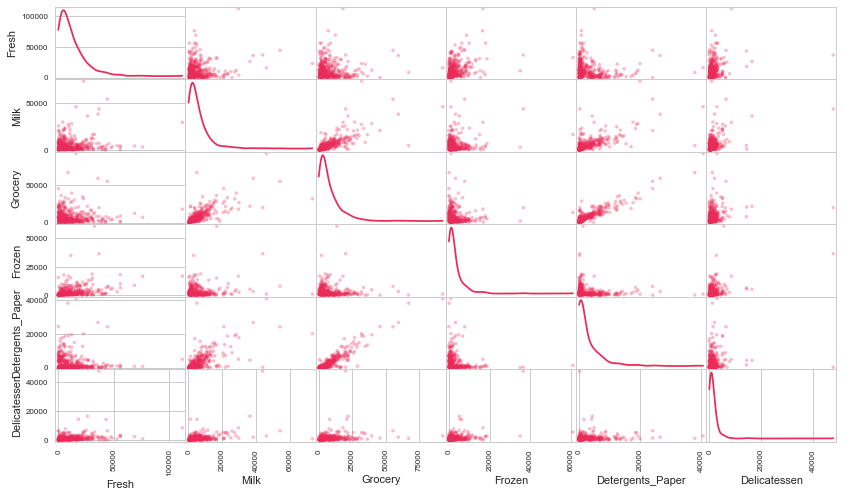

In [12]:
# Produza uma matriz de dispersão para cada um dos pares de atributos dos dados
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

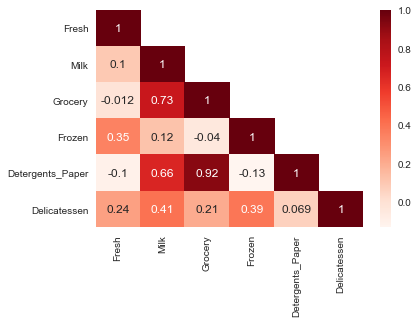

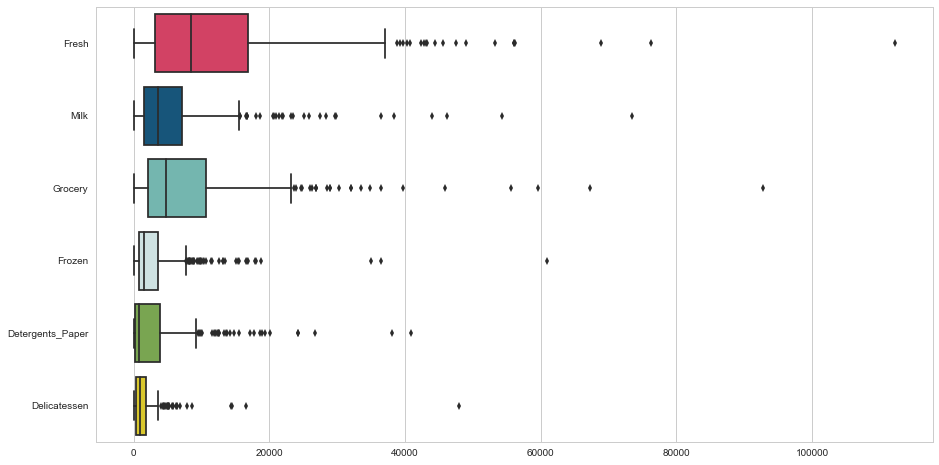

In [13]:
#Verificando a correlação entre cada feature
correlation = data.corr()
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask, 1)] = True
sns.heatmap(correlation, annot= True, mask=mask,cmap='Reds')
#Plotando boxplot
plt.subplots(figsize=(15,8))
sns.boxplot(data=data, orient='h', palette=palette);

C:\Users\c211263\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


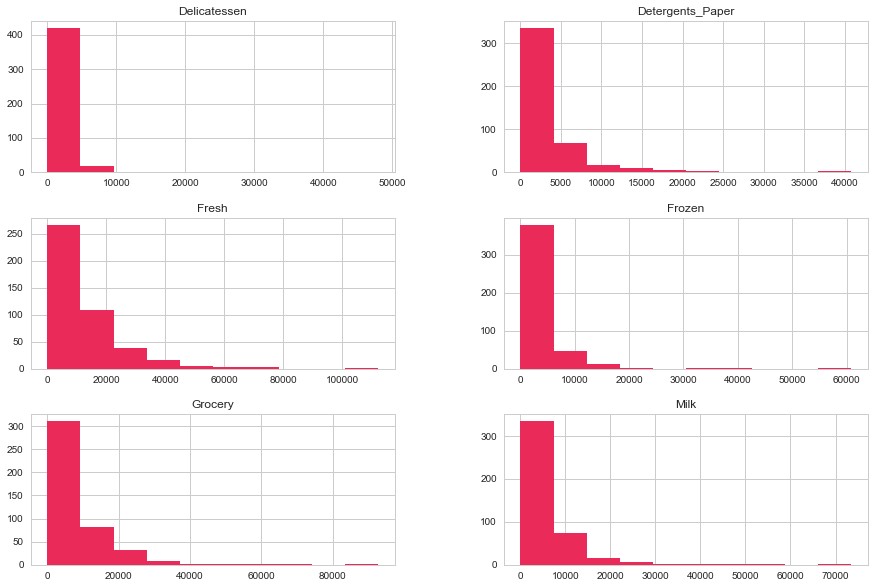

In [14]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
data.hist(column=data.columns, ax=ax);

In [15]:
#Testando se tem distribuição normal
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import normaltest

#Verificando se tem distribuição normal pelo teste de Shapiro Wilk e D’Agostino’s K^2, plotando o Normal Q-Q Plot
def CheckNormalidade(dataset):
    for i in dataset.columns:
        qqplot(dataset[i], line='s')
        plt.title("Normal Q-Q plot de {}".format(i))
        stat, p = shapiro(dataset[i])
        stat2, p2 = normaltest(dataset[i])
        alpha = 0.05
        if (p > alpha) & (p2 > alpha):
            print('A distribuição de {} é normal'.format(i))
            print('Shapiro Wilk Test: Statistics={:.2f}, p={:.2f}'.format(stat, p))
            print('D’Agostino’s K^2 Test: Statistics={:.2f}, p={:.2f}\n'.format(stat2, p2))

        elif (p > alpha) & (p2 < alpha):
            print('A distribuição de {} é normal pelo test Shapiro Wilk, mas não é normal pelo teste D’Agostino’s K^2'.format(i))
            print('Shapiro Wilk Test: Statistics={:.2f}, p={:.2f}'.format(stat, p))
            print('D’Agostino’s K^2 Test: Statistics={:.2f}, p={:.2f}\n'.format(stat2, p2))
        elif (p < alpha) & (p2 > alpha):
            print('A distribuição de {} não é normal pelo test Shapiro Wilk, mas é normal pelo teste D’Agostino’s K^2'.format(i))
            print('Shapiro Wilk Test: Statistics={:.2f}, p={:.2f}'.format(stat, p))
            print('D’Agostino’s K^2 Test: Statistics={:.2f}, p={:.2f}\n'.format(stat2, p2))    
        else:
            print('A distribuição de {} não é normal'.format(i))
            print('Shapiro Wilk Test: Statistics={:.2f}, p={:.2f}'.format(stat, p))
            print('D’Agostino’s K^2 Test: Statistics={:.2f}, p={:.2f}\n'.format(stat2, p2))
        

A distribuição de Fresh não é normal
Shapiro Wilk Test: Statistics=0.78, p=0.00
D’Agostino’s K^2 Test: Statistics=274.34, p=0.00

A distribuição de Milk não é normal
Shapiro Wilk Test: Statistics=0.63, p=0.00
D’Agostino’s K^2 Test: Statistics=410.65, p=0.00

A distribuição de Grocery não é normal
Shapiro Wilk Test: Statistics=0.68, p=0.00
D’Agostino’s K^2 Test: Statistics=374.02, p=0.00

A distribuição de Frozen não é normal
Shapiro Wilk Test: Statistics=0.53, p=0.00
D’Agostino’s K^2 Test: Statistics=546.90, p=0.00

A distribuição de Detergents_Paper não é normal
Shapiro Wilk Test: Statistics=0.61, p=0.00
D’Agostino’s K^2 Test: Statistics=371.82, p=0.00

A distribuição de Delicatessen não é normal
Shapiro Wilk Test: Statistics=0.36, p=0.00
D’Agostino’s K^2 Test: Statistics=793.30, p=0.00



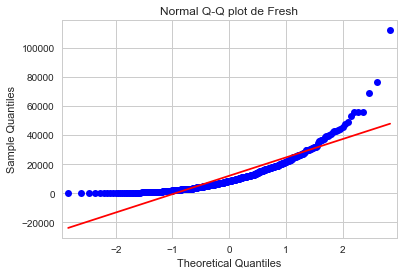

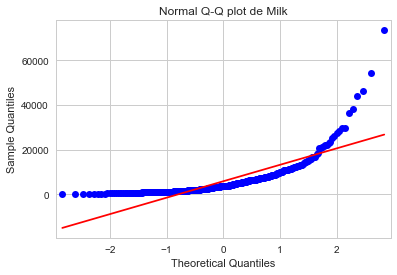

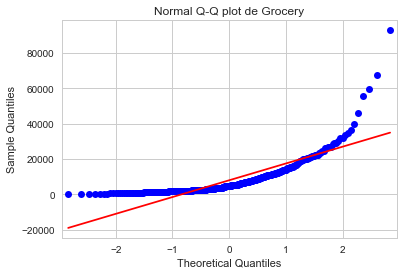

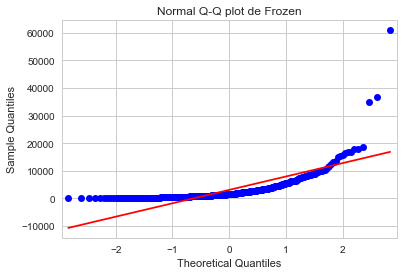

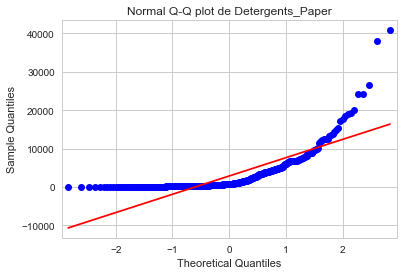

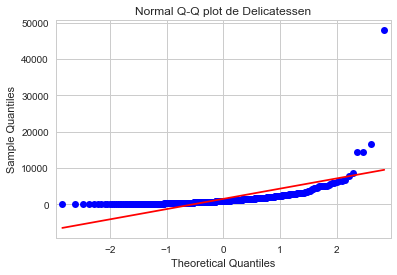

In [16]:
CheckNormalidade(data)

### Questão 3:

- Usando a matriz de dispersão como referência, discuta a distribuição da base de dados. Elabore sua resposta considerando a normalidade, _outliers_, a grande quantidade de pontos próximo de 0 e outras coisas que julgar importante. Se necessário, você pode realizar outros plots para complementar sua explicação.
- Há algum par de atributos que mostra algum grau de correlação?
- Como isso confirma ou nega a suspeita sobre relevância do atributo que você tentou prever?
- Como os dados desses atributos são distribuidos?

**Dica:** Os dados são distribuídos normalmente? Onde a maioria dos pontos estão? Você pode usar [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) para ver a correlação dos atributos e visualiza-los utilizando um [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(os dados que alimentam o heatmap seriam as correlações, por exemplo `data.corr()`)

**Resposta:**

- **Há algum par de atributos que mostra algum grau de correlação?**
    - Detergents_Paper e Grocery possuem uma correlação alta, 0.92
    - Milk e Grocery tem correlação alta, 0.73
    - Milk e Detengents_Paper tem uma correlação menor que os itens acima, contudo ainda alta: 0.66
    
    
- **Como isso confirma ou nega a suspeita sobre relevância do atributo que você tentou prever?**
    - Acredito que isso nega a afirmação que *Milk* é difícil de prever utilizando outros atributos. Ele tem uma correlação muito forte com os outros dois citados acima. Como Detergents_Paper e Grocery possuem uma correlação de 0.92 eles podem ser melhores previstos.
    
- **Como os dados desses atributos são distribuidos?**
    - Os dados não possuem distribuição normal como podemos ver nos plots acima. Os dados estão muito mais próximos a valores pequenos e 0 e existem muitos outliers (visto no plot do boxplot)


## Pré-processamento de Dados
Nesta seção, você irá pré-processar os dados para criar uma melhor representação dos clientes ao executar um escalonamento dos dados e detectando os discrepantes. Pré-processar os dados é geralmente um passo fundamental para assegurar que os resultados obtidos na análise são importantes e significativos.

### Implementação: Escalonando Atributos
Se os dados não são distribuídos normalmente, especialmente se a média e a mediana variam significativamente (indicando um grande desvio), é quase sempre [apropriado] ](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) aplicar um escalonamento não linear – particularmente para dados financeiros. Uma maneira de conseguir escalonar dessa forma é utilizando o [ teste Box-Cox](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), que calcula o melhor poder de transformação dos dados, que reduzem o desvio. Uma abordagem simplificada que pode funcionar na maioria dos casos seria aplicar o algoritmo natural.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Atribua uma cópia dos dados para o `log_data` depois de aplicar um algoritmo de escalonamento. Utilize a função `np.log` para isso.
 - Atribua uma cópia da amostra do dados para o `log_samples` depois de aplicar um algoritmo de escalonamento. Novamente, utilize o `np.log`.

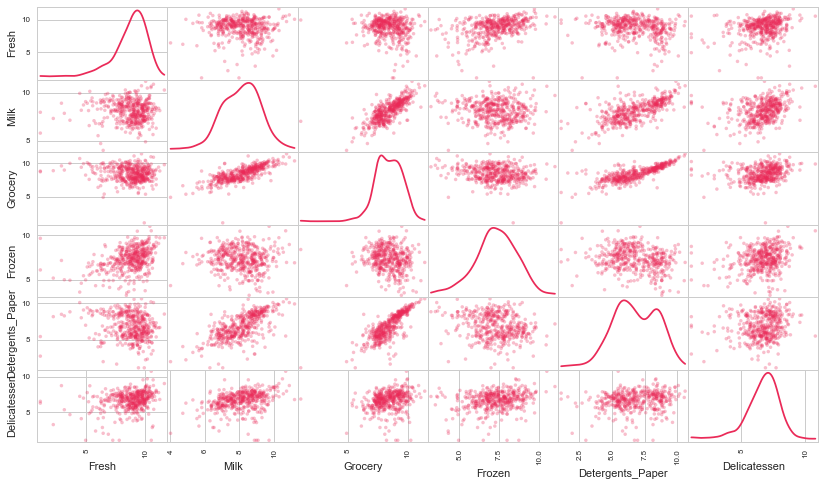

In [17]:
# TODO: Escalone os dados utilizando o algoritmo natural
log_data = np.log(data)

# TODO: Escalone a amostra de dados utilizando o algoritmo natural
log_samples = np.log(samples)

# Produza uma matriz de dispersão para cada par de atributos novos-transformados
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

A distribuição de Fresh não é normal
Shapiro Wilk Test: Statistics=0.89, p=0.00
D’Agostino’s K^2 Test: Statistics=156.99, p=0.00

A distribuição de Milk é normal
Shapiro Wilk Test: Statistics=0.99, p=0.09
D’Agostino’s K^2 Test: Statistics=4.75, p=0.09

A distribuição de Grocery não é normal
Shapiro Wilk Test: Statistics=0.96, p=0.00
D’Agostino’s K^2 Test: Statistics=76.75, p=0.00

A distribuição de Frozen não é normal
Shapiro Wilk Test: Statistics=0.99, p=0.00
D’Agostino’s K^2 Test: Statistics=10.74, p=0.00

A distribuição de Detergents_Paper não é normal
Shapiro Wilk Test: Statistics=0.98, p=0.00
D’Agostino’s K^2 Test: Statistics=6.02, p=0.05

A distribuição de Delicatessen não é normal
Shapiro Wilk Test: Statistics=0.93, p=0.00
D’Agostino’s K^2 Test: Statistics=106.25, p=0.00



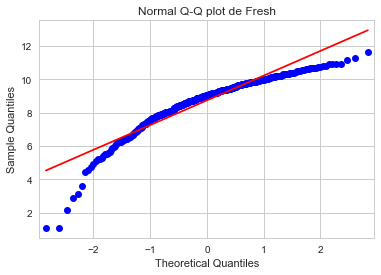

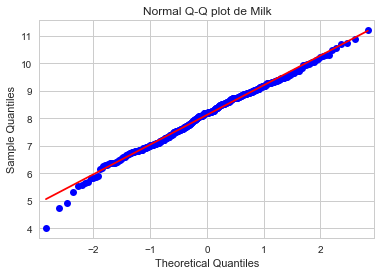

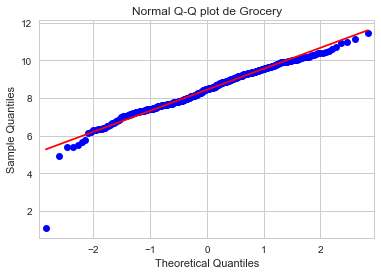

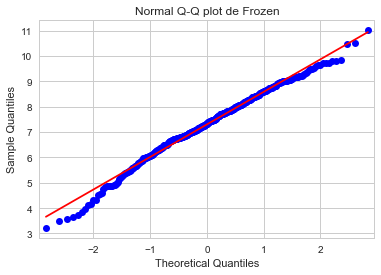

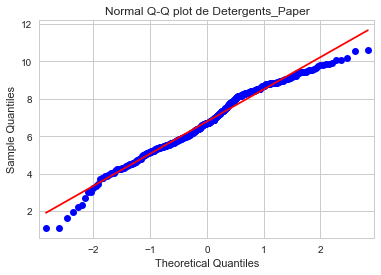

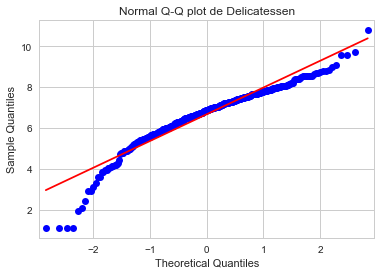

In [18]:
CheckNormalidade(log_data)

### Observação
Após aplicar o algoritmo natural para o escalonamento dos dados, a distribuição para cada atributo deve parecer mais normalizado. Para muitos pares de atributos, você vai precisar identificar anteriormente como sendo correlacionados, observe aqui se essa correlação ainda está presente (e se está mais forte ou mais fraca que antes).

Execute o código abaixo para ver como a amostra de dados mudou depois do algoritmo natural ter sido aplicado a ela.

In [19]:
# Mostre a amostra dados log-transformada
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Cliente,,,,,,
344,8.020599,7.066467,7.474772,7.711549,5.379897,5.937536
54,10.215704,7.278629,7.574045,7.798113,5.318120,7.195187
160,7.452982,8.202756,9.458918,6.714171,8.394800,7.676474


### Implementação: Detecção de valores atípicos (_Outlier_)
Identificar dados discrepantes é extremamente importante no passo de pré-processamento de dados de qualquer análise. A presença de discrepantes podem enviesar resultados que levam em consideração os pontos de dados. Há muitas "regras básicas" que constituem um discrepante em um conjunto de dados. Aqui usaremos [o Método Turco para identificar valores atípicos](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): Um *passo do discrepante* é calculado 1,5 vezes a variação interquartil (IQR). Um ponto de dados com um atributo que está além de um passo de um discrepante do IQR para aquele atributo, ele é considerado anormal.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Atribuir o valor do 25º percentil do atributo dado para o `Q1`. Utilizar `np.percentile` para isso.
 - Atribuir o valor do 75º percentil do atributo dado para o `Q3`. Novamente, utilizar `np.percentile`.
 - Atribuir o cálculo de um passo do discrepante do atributo dado para o `step`.
 - Remover opcionalmentos os pontos de dados do conjunto de dados ao adicionar índices à lista de `outliers`.

**NOTA:** Se você escolheu remover qualquer discrepante, tenha certeza que a amostra de dados não contém nenhum desses pontos!  
 Uma vez que você executou essa implementação, o conjunto de dado será armazenado na variável `good_data`!

In [20]:
# Para cada atributo encontre os pontos de dados com máximos valores altos e baixos
outliers_list  = []
for feature in log_data.keys():
    
    # TODO: Calcule Q1 (25º percentil dos dados) para o atributo dado
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calcule Q3 (75º percentil dos dados) para o atributo dado
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Utilize a amplitude interquartil para calcular o passo do discrepante (1,5 vezes a variação interquartil)
    step = (Q3-Q1)*1.5
    
    # Mostre os discrepantes
    print ("Data points considered outliers for the feature {}:".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])    
    x = log_data.index.values[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    for i in x:
        outliers_list.append(i)

# OPCIONAL: Selecione os índices dos pontos de dados que você deseja remover
#Lista de todos outliers únicos
outliers  = list(set(outliers_list))
print("All outliers index are: {}\n".format(outliers))

#Lista de todos outliers que aparecem em duas atributos ou mais e serão tirados das análises
outliers_duplicated = list(set([i for i in outliers_list if outliers_list.count(i)>=2]))
print("All outliers that appear in at least 2 features and will be removed: {}\n".format(outliers_duplicated))
#Checar quantos outliers aparecem aparecem em mais de 2 atributos:
outliers_triplicated = list(set([i for i in outliers_list if outliers_list.count(i)>2]))
print("All outliers that appear more than 2 features: {}\n".format(outliers_triplicated))

for s in samples.index:
    if s not in outliers_duplicated:
        print("The sample {} is not in outliers".format(s))

# Remova os valores atí, caso nenhum tenha sido especificado
good_data = log_data.drop(log_data.index[outliers_duplicated]).reset_index(drop = True)
print("The shape of good_data table is: {}".format(good_data.shape))


Data points considered outliers for the feature Fresh:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature Milk:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature Grocery:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature Frozen:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature Detergents_Paper:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature Delicatessen:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


All outliers index are: [128, 264, 137, 142, 145, 154, 412, 285, 161, 289, 420, 38, 171, 429, 175, 304, 305, 439, 183, 57, 184, 187, 65, 66, 193, 325, 75, 203, 81, 338, 86, 343, 218, 95, 96, 353, 98, 355, 356, 357, 233, 109]

All outliers that appear in at least 2 features and will be removed: [128, 65, 66, 75, 154]

All outliers that appear more than 2 features: [154]

The sample 344 is not in outliers
The sample 54 is not in outliers
The sample 160 is not in outliers
The shape of good_data table is: (435, 6)


### Questão 4
- Há alguns pontos de dado considerados discrepantes de mais de um atributo baseado na definição acima?
- Esses pontos de dados deveriam ser removidos do conjunto?
- Se qualquer ponto de dados foi adicionado na lista `outliers` para ser removido, explique por quê.

**Resposta:**
  - Os pontos 128, 65, 66, 75, 154 são outliers em mais de uma feature, sendo que o 154 aparece em mais de 2 atributos. Sendo assim, creio que esses outliers repetido são necessários remover, uma vez que eles podem tendenciar nossos dados e não serem dados representativos dos clientes, por isso incluí todos eles na lista para remoção.    


A distribuição de Fresh não é normal
Shapiro Wilk Test: Statistics=0.90, p=0.00
D’Agostino’s K^2 Test: Statistics=153.73, p=0.00

A distribuição de Milk é normal
Shapiro Wilk Test: Statistics=1.00, p=0.32
D’Agostino’s K^2 Test: Statistics=1.43, p=0.49

A distribuição de Grocery não é normal pelo test Shapiro Wilk, mas é normal pelo teste D’Agostino’s K^2
Shapiro Wilk Test: Statistics=0.99, p=0.03
D’Agostino’s K^2 Test: Statistics=1.71, p=0.43

A distribuição de Frozen não é normal
Shapiro Wilk Test: Statistics=0.99, p=0.01
D’Agostino’s K^2 Test: Statistics=9.20, p=0.01

A distribuição de Detergents_Paper não é normal
Shapiro Wilk Test: Statistics=0.98, p=0.00
D’Agostino’s K^2 Test: Statistics=6.69, p=0.04

A distribuição de Delicatessen não é normal
Shapiro Wilk Test: Statistics=0.94, p=0.00
D’Agostino’s K^2 Test: Statistics=92.65, p=0.00



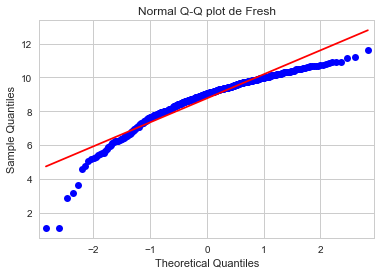

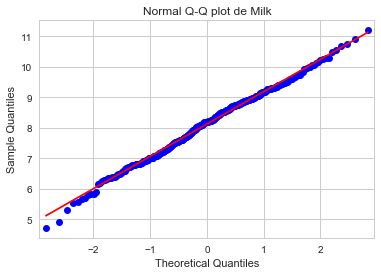

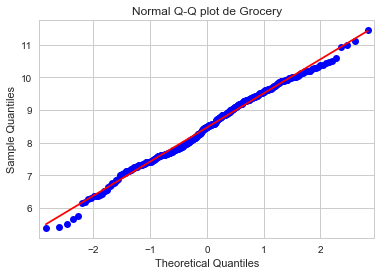

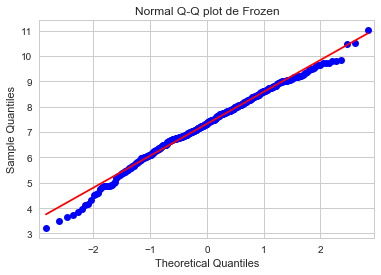

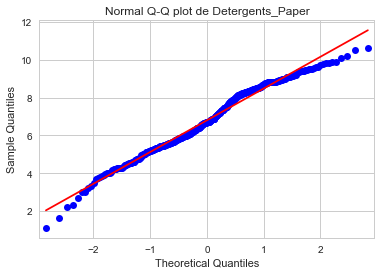

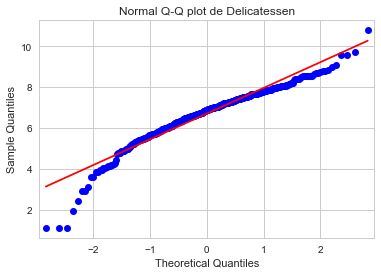

In [21]:
CheckNormalidade(good_data)

## Transformação de Atributo
Nesta seção, você irá utilizar a análise de componentes principais (PCA) para elaborar conclusões sobre a estrutura subjacente de dados de clientes do atacado. Dado que ao utilizar a PCA em conjunto de dados calcula as dimensões que melhor maximizam a variância, nós iremos encontrar quais combinações de componentes de atributos melhor descrevem os consumidores.

### Implementação: PCA

Agora que os dados foram escalonados em uma distribuição normal e qualquer discrepante necessário foi removido, podemos aplicar a PCA na `good_data` para descobrir qual dimensão dos dados melhor maximizam a variância dos atributos envolvidos. Além de descobrir essas dimensões, a PCA também irá reportar a *razão da variância explicada* de cada dimensão – quanta variância dentro dos dados é explicada pela dimensão sozinha. Note que o componente (dimensão) da PCA pode ser considerado como um novo "feature" do espaço, entretanto, ele é uma composição do atributo original presente nos dados.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Importar o `sklearn.decomposition.PCA` e atribuir os resultados de ajuste da PCA em seis dimensões com o `good_data` para o `pca`.
 - Aplicar a transformação da PCA na amostra de log-data `log_samples` utilizando `pca.transform`, e atribuir os resultados para o `pca_samples`.

The variance ratio for Dimension 1 is: 0.4430
The variance ratio for Dimension 2 is: 0.2638
The variance ratio for Dimension 3 is: 0.1231
The variance ratio for Dimension 4 is: 0.1012
The variance ratio for Dimension 5 is: 0.0485
The variance ratio for Dimension 6 is: 0.0204


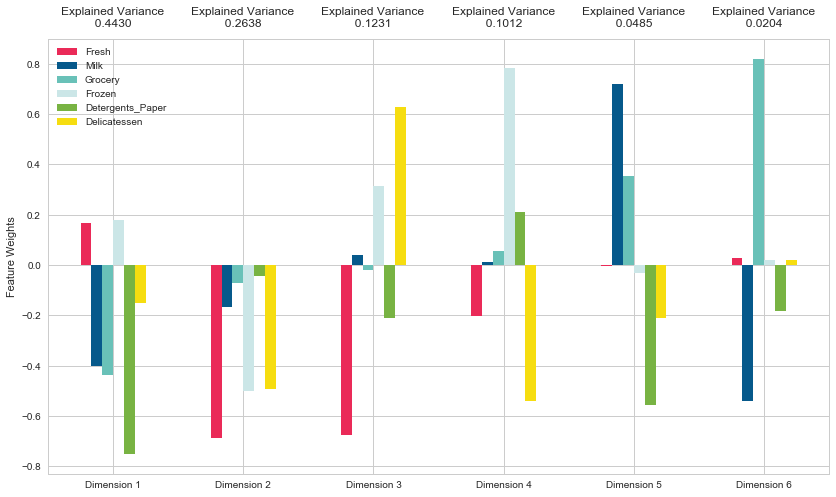

In [22]:
from sklearn.decomposition import PCA

# TODO: Aplique a PCA ao ajustar os bons dados com o mesmo número de dimensões como atributos
pca = PCA(n_components=6, random_state=50)
pca.fit(good_data)

# TODO: Transforme a amostra de data-log utilizando o ajuste da PCA acima
pca_samples = pca.transform(log_samples)

# Gere o plot dos resultados da PCA
pca_results = vs.pca_results(good_data, pca)
n=1
for i in pca.explained_variance_ratio_:    
    print("The variance ratio for Dimension {} is: {:.4f}".format(n,i))
    n +=1

In [23]:
df3 = pca_results
df4 = pca_results['Explained Variance'].cumsum()
pd.concat([df3, df4], axis=1)

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Explained Variance
Dimension 1,0.4430,0.1675,-0.4014,-0.4381,0.1782,-0.7514,-0.1499,0.4430
Dimension 2,0.2638,-0.6859,-0.1672,-0.0707,-0.5005,-0.0424,-0.4941,0.7068
Dimension 3,0.1231,-0.6774,0.0402,-0.0195,0.3150,-0.2117,0.6286,0.8299
Dimension 4,0.1012,-0.2043,0.0128,0.0557,0.7854,0.2096,-0.5423,0.9311
Dimension 5,0.0485,-0.0026,0.7192,0.3554,-0.0331,-0.5582,-0.2092,0.9796
Dimension 6,0.0204,0.0292,-0.5402,0.8205,0.0205,-0.1824,0.0197,1.0000


### Questão 5
- Quanta variância nos dados é explicada **no total** pelo primeiro e segundo componente principal?
- Quanta variância nos dados é explicada pelos quatro primeiros componentes principais?
- Utilizando a visualização fornecida acima, discuta quais das quatro primeiras dimensões que melhor representam em termos de despesas dos clientes. Explique qual das quatro representa melhor em termos de consumo dos clientes.

**Dica:** Uma melhora positiva dentro de uma dimensão específica corresponde a uma *melhora* do atributos de *pesos-positivos* e uma *piora* dos atributos de *pesos-negativos*. A razão de melhora ou piora é baseada nos pesos de atributos individuais.

**Resposta:**

- **Quanta variância nos dados é explicada no total pelo primeiro e segundo componente principal?**
    - A variância total para do primeiro é 0.4430 e o segundo é 0.2638, então o total é 70,68%
    
    
- **Quanta variância nos dados é explicada pelos quatro primeiros componentes principais?**
    - Pelos quatro primeiros componetes é 93,11%
    
    
- **Utilizando a visualização fornecida acima, discuta quais das quatro primeiras dimensões que melhor representam em termos de despesas dos clientes. Explique qual das quatro representa melhor em termos de consumo dos clientes.**
    - PC1:  Milk, Grocery e Detergents_Paper são os gastos que mais decrescem, o que faz sentido pelo o que foi analisado anteriormente. Esses três atributos são o que mais explicam esse componente. O perfil de cliente pode ser supermercado.
    - PC2:  Todos os atributos decrescem, contudo Fresh, Frozen e Delicatessen são os gastos que mais decrescem. Esses três atributos são o que mais explicam esse componente. O perfil de cliente pode ser de um restaurante.
    - PC3:  Enquanto os gastos com Fresh decrescem, os gastos com Delicatessen aumentam quase na mesma proporção e com os gastos com Frozen acompanhando-o um pouco. Esses três atributos são o que mais explicam esse componente. O perfil de cliente pode ser de Café.
    - PC4:  Enquanto os gastos com Frozen crescem fortemente, os gastos com Delicatessen diminuem. Esses dois atributos são o que mais explicam esse componente. O perfil de cliente pode ser uma conveniência de posto de gasolina


### Observação
Execute o código abaixo para ver como a amostra de log transformado mudou depois de receber a transformação da PCA aplicada a ele em seis dimensões. Observe o valor numérico para as quatro primeiras dimensões para os pontos da amostra. Considere se isso for consistente com sua interpretação inicial dos pontos da amostra.

In [24]:
# Exiba a amostra de log-data depois de aplicada a tranformação da PCA
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.9818,0.9996,0.4286,0.5009,-0.1744,-0.0049
1,2.0941,-1.2108,-0.2209,-0.5664,-0.2238,0.0638
2,-2.1425,0.5705,0.9605,-0.3527,-0.6641,0.4568


### Implementação: Redução da Dimensionalidade
Ao utilizar um componente principal de análise, um dos objetivos principais é reduzir a dimensionalidade dos dados – na realidade, reduzindo a complexidade do problema. Redução de dimensionalidade tem um custo: Poucas dimensões utilizadas implicam em menor variância total dos dados que estão sendo explicados. Por causo disso, a *taxa de variância explicada cumulativa* é extremamente importante para saber como várias dimensões são necessárias para o problema. Além disso, se uma quantidade significativa de variância é explicada por apenas duas ou três dimensões, os dados reduzidos podem ser visualizados depois.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Atribuir os resultados de ajuste da PCA em duas dimensões com o `good_data` para o `pca`.
 - Atribuir a tranformação da PCA do `good_data` utilizando `pca.transform`, e atribuir os resultados para `reduced_data`.
 - Aplicar a transformação da PCA da amostra do log-data `log_samples` utilizando `pca.transform`, e atribuindo os resultados ao `pca_samples`.

In [25]:
# TODO: Aplique o PCA ao ajusta os bons dados com apenas duas dimensões
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transforme os bons dados utilizando o ajuste do PCA acima
reduced_data = pca.transform(good_data)

# TODO: Transforme a amostre de log-data utilizando o ajuste de PCA acima
pca_samples = pca.transform(log_samples)

# Crie o DataFrame para os dados reduzidos
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observação
Execute o código abaixo para ver como a amostra de dados do log-transformado mudou depois de receber a transformação do PCA aplicada a ele em apenas duas dimensões. Observe como os valores das duas primeiras dimensões permanessem constantes quando comparados com a transformação do PCA em seis dimensões.

In [26]:
# Exiba a amostra de log-data depois de aplicada a transformação da PCA em duas dimensões
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.9818,0.9996
1,2.0941,-1.2108
2,-2.1425,0.5705


## Visualizando um Biplot
Um biplot é um gráfico de dispersão onde cada ponto é representado por sua pontuação junto das componentes principais. Os eixos são as componentes principais (nesse caso, `Dimension 1` e `Dimenson 2`). Além disso, o biplot mostra a projeção dos atributos originais junto das componentes. Um biplot pode nos ajudar a interpretar a redução da dimensionalidade dos dados e descobrir relacionamentos entre as componentes principais e os atributos originais.

Execute a célula abaixo para produzir um biplot com os dados de dimensionalidade reduzida.

A distribuição de Dimension 1 não é normal
Shapiro Wilk Test: Statistics=0.98, p=0.00
D’Agostino’s K^2 Test: Statistics=12.25, p=0.00

A distribuição de Dimension 2 não é normal
Shapiro Wilk Test: Statistics=0.98, p=0.00
D’Agostino’s K^2 Test: Statistics=32.79, p=0.00



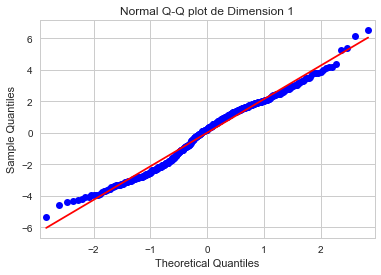

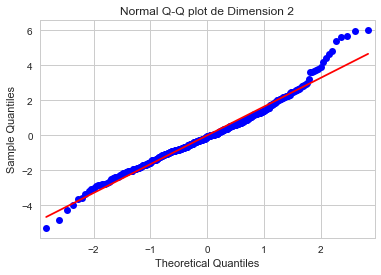

In [27]:
CheckNormalidade(reduced_data)

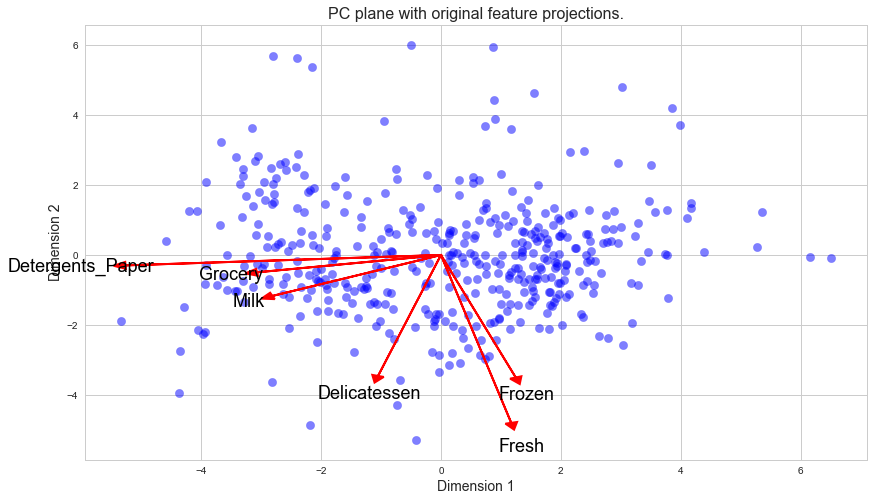

In [28]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca);

## Clustering

Nesta seção, você irá escolher utilizar entre o algoritmo de clustering K-Means ou o algoritmo de clustering do Modelo de Mistura Gaussiano para identificar as várias segmentações de clientes escondidos nos dados. Então você irá recuperar pontos de dados específicos do cluster para entender seus significados ao transformá-los de volta em suas dimensões e escalas originais. 

### Questão 6
- Quais são as vantagens de utilizar o algoritmo de clustering K-Means?
- Quais são as vantagens de utilizar o algoritmo de clustering do Modelo de Mistura Gaussiano?
- Dadas as suas observações até agora sobre os dados de clientes da distribuidora, qual dos dois algoritmos você irá utilizar e por quê.

**Dica: **Pense na diferença entre os clusters mais próximos ou mais isolados.

**Resposta:**

### K-means Clustering(Agrupamento K-means)

#### O que é?
Um algoritmo que agrupa dados que possuem características similares entre si em um *cluster*. O método K-means tem esse nome porque *K* representa um número, uma vez que é necessário dizer ao algoritmo em quantos clusters deseja a divisão dos dados.
K-means é mais utilizade em uso geral,com clusters de tamanhos iguais, geometria plana, sem grandes quantidades de clusters.

K-means sempre tenta encontrar clusters circulares, esféricos.

Ele usa a medida de distancia para dizer o quão similiar cada observação é, podendo ser:
   * Distância Euclidiana: distância euclidiana entre dois pontos em uma linha reta
   * Distância de Manhattan:Soma das distâncias entre as linhas que foram 90º entre dois pontos, ou seja, soma da linha y até o ponto de intersecção e a linha x. Essas medidas são sensíveis à diferença de escalas entre variáveis distintas:
   * Distância do Cosseno: medida do ângulo entre dois vetores. Se o ângulo é 0 existe total similariade e se é π não existe relação entre os objetos.


* **Onde pode ser usado?**
    * Performance acadêmica, baseado nas notas de estudantes para separar entre estudantes A, B ou C
    * Sistema de diagnóstico
    * Classificação de catálogo de filmes
    * Classificação de espécies de animais ou plantas
    * Segmentação de clientes de acordo com perfis de consumo


* **Vantagens**
    * Fácil implentação e interpretação
    * Bom quando já se possui uma ideia do número necessários de clusters
    * Boa escabilidade com muitas variáveis se o k não for tão alto


* **Desvantagens**
    * As *sementes (seeds)* inicias tem um grande impacto nos resultados finais devido o local minumm, quando são iniciados em locais não tão adequados. Dificuldade que pode ser contornada rodando o algorítmo muitas vezes
    * Difícil de prever o número de clusters (K-Value), pode-se usar *elbow method* para contornar isso
    * Sensível a outliers
    * Não trabalha bem com missing values
    * Não trabalha bem com clusters que não são circulares ou esféricos
    
### Gaussian Mixture Models - GMM (Modelos de Mistura de Gaussianas)

#### O que é?
O algoritmo de agrupamento leve na qual todo dado é parte de todos os clusters, contudo com níveis diferentes de pertencimento. Ele faz uma distribuição de dados, e se for gaussiana eles tem um nivel de agrupamento maior, ou seja, ele mistura as distribuições gaussianas para separar os clusters.

Ele funciona pelo algortimo de Maximização da Expectativa, nos seguintes passos:

* Definir K, número distribuições gaussianas. Setar média e variâncias 
  
* Passo E, agrupamento suave dos dados. calcula o grau de pertenciomento de cada ponto para cada cluster
  
* Passo M, passo da maximização, usar os dados do passo anterior e criar novos paramettos de média e variância para cada cluster. de forma ponderada levando em conta o nível de pertencimetno de cada ponto
  
* Validar o log-likelihood (log-verossimilhança) para checar se converge. Quanto maior o número mais certeza temos que o modelo de mistura que geramos é responsavel pela criação dos dados ou que encaixe no dataset que temos


* **Onde pode ser usado?**
    * Leitura de dados de sensores para encontrar rotinas de pessoas. Ex: Como um sensor de deslocamento, o algoritmo consegue identificar quando estão no escritório, jantando ou fora. Ou também, consegue diferenciar qual o meio de condução que a pessoa utilizada. Veja a [documentação](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.681.3152&rep=rep1&type=pdf)
    * Identificar fala, assinaturas, biometria.
    * Visão computacional, consegue detectar fundos de imagem, por exemplo tirando pessoas de uma vídeo e deixando apenas o cenário. Veja a [documentação](http://www.ai.mit.edu/projects/vsam/Publications/stauffer_cvpr98_track.pdf)


* **Vantagens**
    * Precisa de menos treino que outros modelos, como regressão logística
    * Alta escalabilidade
    * Não é sensível a *features* com pouca importância
    * Retorna o grau de certeza da resposta
    * Agrupamento leve, que faz com que amostras possam fazer parte de múltiplos clusters


* **Desvantagens**
    * Sensível aos valores de inicialização
    * A taxa de convergência é lenta
    * Não é bom em aprender com interações de *features*, por exemplo, se vocês gosta de sorvete de flocos e chocolate, mas odeia os dois sabores juntos
    
    
    
### Dadas as suas observações até agora sobre os dados de clientes da distribuidora, qual dos dois algoritmos você irá utilizar e por quê.
Dadas as informações coletadas acima, vou optar pelo KMeans porque além ele ter uma rápida implementação, os dados tem um formato esférico na plotagem, já resolvemos os problemas com outliers e não teremos muitas dimensões. Outro ponto foi que mesmo fazendo a transformação log, nem todos as features estão com uma distribuição normal segundo os testes de Shapiro e/ou D’Agostino’s K^2, o que pode ser um problema para utilizar GMM.

### Implementação: Criando Clusters
Dependendo do problema, o número de clusters que você espera que estejam nos dados podem já ser conhecidos. Quando um número de clusters não é conhecido *a priori*, não há garantia que um dado número de clusters melhor segmenta os dados, já que não é claro quais estruturas existem nos dados – se existem. Entretanto, podemos quantificar a "eficiência" de um clustering ao calcular o *coeficiente de silhueta* de cada ponto de dados. O [coeficiente de silhueta](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) para um ponto de dado mede quão similar ele é do seu cluster atribuído, de -1 (não similar) a 1 (similar). Calcular a *média* do coeficiente de silhueta fornece um método de pontuação simples de um dado clustering.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Ajustar um algoritmo de clustering para o `reduced_data` e atribui-lo ao `clusterer`.
 - Prever o cluster para cada ponto de dado no `reduced_data` utilizando o `clusterer.predict` e atribuindo eles ao `preds`.
 - Encontrar os centros do cluster utilizando o atributo respectivo do algoritmo e atribuindo eles ao `centers`.
 - Prever o cluster para cada amostra de pontos de dado no `pca_samples` e atribuindo eles ao `sample_preds`.
 - Importar sklearn.metrics.silhouette_score e calcular o coeficiente de silhueta do `reduced_data` contra o do `preds`.
   - Atribuir o coeficiente de silhueta para o `score` e imprimir o resultado.

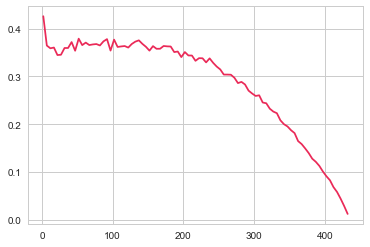

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
k_values = range(2, len(reduced_data)+1, 5)
scores = []
for k in k_values:
    # TODO: Aplique o algoritmo de clustering de sua escolha aos dados reduzidos 
    clusterer_teste = KMeans(n_clusters=k, random_state=50).fit(reduced_data)

    # TODO: Preveja o cluster para cada ponto de dado
    preds_teste = clusterer_teste.predict(reduced_data)

    # TODO: Calcule a média do coeficiente de silhueta para o número de clusters escolhidos
    score = silhouette_score(reduced_data, preds_teste, random_state=50)
    scores.append((k, score))
    
scores = pd.DataFrame(scores)
plt.plot(scores[0], scores[1]);

In [30]:
display(scores)

,0,1
0,2,0.426281
1,7,0.364801
2,12,0.359062
3,17,0.360648
4,22,0.344914
5,27,0.345532
6,32,0.359660
7,37,0.359764
8,42,0.372120
9,47,0.353954


In [32]:
# TODO: Aplique o algoritmo de clustering de sua escolha aos dados reduzidos 
clusterer = KMeans(n_clusters=2, random_state=50).fit(reduced_data)

# TODO: Preveja o cluster para cada ponto de dado
preds = clusterer.predict(reduced_data)

# TODO: Ache os centros do cluster
centers = clusterer.cluster_centers_

# TODO: Preveja o cluster para cada amostra de pontos de dado transformados
sample_preds = clusterer.predict(pca_samples)

# TODO: Calcule a média do coeficiente de silhueta para o número de clusters escolhidos
score = silhouette_score(reduced_data, preds)

### Questão 7
- Reporte o coeficiente de silhueta para vários números de cluster que você tentou.
- Dentre eles, qual a quantidade de clusters que tem a melhor pontuação de silhueta?

**Resposta:**

Utilizei o método Elbow para encontrar o melhor número de clusters, podendo ser visto no gráfico e tabela acima. A quantidade de clusters com melhor pontuação foi 2 com um coeficiente de silhueta de 0.4263


### Visualização de Cluster
Uma vez que você escolheu o número ótimo de clusters para seu algoritmo de clustering utilizando o método de pontuação acima, agora você pode visualizar os resultados ao executar o bloco de código abaixo. Note que, para propósitos de experimentação, é de bom tom que você ajuste o número de clusters para o seu algoritmo de cluster para ver várias visualizações. A visualização final fornecida deve, entretanto, corresponder com o número ótimo de clusters. 

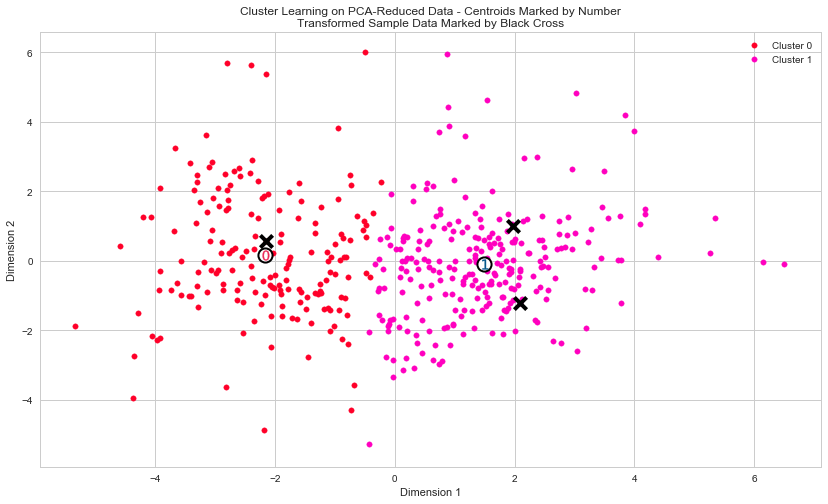

In [33]:
# Mostre os resultados do clustering da implementação
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementação: Recuperação de Dados
Cada cluster apresentado na visualização acima tem um ponto central. Esses centros (ou médias) não são especificamente pontos de dados não específicos dos dados, em vez disso, são *as médias* de todos os pontos estimados em seus respectivos clusters. Para o problema de criar segmentações de clientes, o ponto central do cluster corresponde *a média dos clientes daquele segmento*. Já que os dados foram atualmente reduzidos em dimensões e escalas por um algoritmo, nós podemos recuperar a despesa representativa do cliente desses pontos de dados ao aplicar transformações inversas.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Aplicar a transformação inversa para o `centers` utilizando o `pca.inverse_transform`, e atribuir novos centros para o `log_centers`.
 - Aplicar a função inversa do `np.log` para o `log_centers` utilizando `np.exp`, e atribuir os verdadeiros centros para o `true_centers`.


In [49]:
# TODO: Transforme inversamento os centros
log_centers = pca.inverse_transform(centers)

# TODO: Exponencie os centros
true_centers = np.exp(log_centers)

# Mostre os verdadeiros centros
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4005.0,7900.0,12104.0,952.0,4561.0,1036.0
Segment 1,8867.0,1897.0,2477.0,2088.0,294.0,681.0


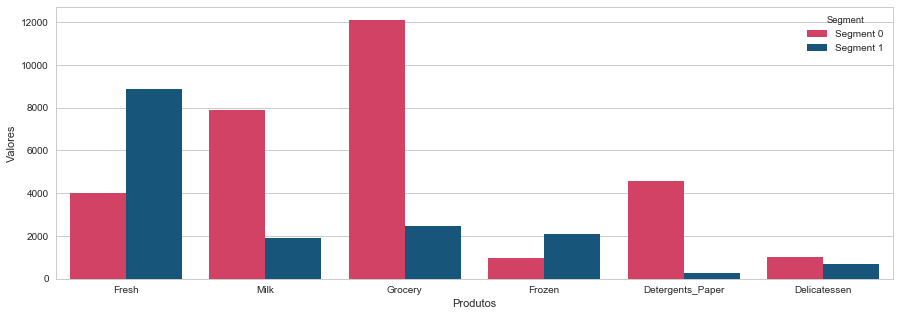

In [35]:
#Transformar a tabela para que fique uma coluna com os produtos e outras com valores e plotar
true_centers.index.names = ['Segment']
true_centers2 = true_centers.reset_index().melt(var_name='Produtos', value_name='Valores', id_vars='Segment')
plt.subplots(figsize=(15,5))
sns.barplot(x='Produtos', y='Valores', data=true_centers2, hue='Segment');

### Questão 8
- Considere o gasto total de compra de cada categoria de produto para os pontos de dados representativos acima e reporte a descrição estatística do conjunto de dados no começo do projeto. Qual conjunto de estabelecimentos cada segmentação de clientes representa?

**Dica:** Um cliente que é atribuído ao `'Cluster X'` deve se identificar melhor com os estabelecimentos representados pelo conjunto de atributos do `'Segment X'`. Pense no que cada segmento representa em termos do ponto de atributo escolhido.

**Resposta:**

* **Segmento 0**: Neste segmento os atribuitos *Milk*, *Grocery* e *Detergents_Paper* estão acima da média e dos 75% de gastos, enquantos os outros atributos estão abaixo, no caso de *Frozen* muito abaixo. Esses gastos são comuns de supermercados.

* **Segmento 1**: Neste segmento nenhum dos gastos está acima da média. Contudo, *Fresh* possui um gasto um pouco mais elevado, estanto acima dos 50% de gastos do atributo, acredito que esses gastos são comuns de restaurantes


### Questão 9
- Para cada amostra de ponto, qual segmento de cliente da **Questão 8** é melhor representado?
- As previsões para cada amostra de ponto são consistentes com isso?

Execute o bloco de códigos abaixo para saber a previsão de segmento para cada amostra de ponto.

In [46]:
# Mostre as previsões
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Resposta:**

Para facilitar o entendimento vou enumerar os pontos de acordo com o índice de `data`, sendo em ordem os pontos: 344, 54 e 160:


**Índice 344**: foi previsto para estar no cluster 1, que é o Segmento 1, de restaurantes. Isso condiz com o que mencionei no ínicio do exercício, uma vez que previ que ele seria um posto de gasolina ou um **restaurante de hotel**.

**Índice 54**: foi previsto para estar no cluster 1, que é o Segmento 1, de restaurantes. Isso condiz com o que mencionei no ínicio do exercício, uma vez que previ que ele seria um **restaurante** ou hortifruti.

**Índice 160**: foi previsto para estar no cluster 0, que é o Segmento 0, de restaurantes. Isso condiz com o que mencionei no ínicio do exercício, uma vez que previ que ele seria um **supermercado** 

## Conclusão

Nesta seção final, você irá investigar maneiras de fazer uso dos dados que estão em clusters. Primeiro você vai considerar quais são os diferentes grupos de clientes, a **segmentação de clientes**, que pode ser afetada diferentemente por um esquema de entrega específico. Depois, você vai considerar como dar um rótulo para cada cliente (qual *segmento* aquele cliente pertence), podendo fornecer atributos adicionais sobre os dados do cliente. Por último, você vai comparar a **segmentação de clientes** com uma variável escondida nos dados, para ver se o cluster identificou certos tipos de relação.

### Questão 10
Empresas sempre irão executar os [testes A/B](https://en.wikipedia.org/wiki/A/B_testing) ao fazer pequenas mudanças em seus produtos ou serviços para determinar se ao fazer aquela mudança, ela afetará seus clientes de maneira positiva ou negativa. O distribuidor de atacado está considerando mudar seu serviço de entrega de atuais 5 dias por semana para 3 dias na semana. Mas o distribuidor apenas fará essa mudança no sistema de entrega para os clientes que reagirem positivamente.
- Como o distribuidor de atacado pode utilizar a segmentação de clientes para determinar quais clientes, se há algum, que serão alcançados positivamente à mudança no serviço de entrega?

**Dica:** Podemos supor que as mudanças afetam todos os clientes igualmente? Como podemos determinar quais grupos de clientes são os mais afetados?

**Resposta:**

A empresa pode utilizar os métodos de segmentação para separar seus clientes entre aqueles que atualmentete utilizam o serviço de entrega por 5 dias da semana e aqueles que utilizam 3.Em testes A/B temos uma hipótese nula que precisa ser definida, podendo ser "alterar os dias de entrega de 5 para 3 não afetará a clientela" é preciso modelar o experimento.

É necessário calcular uma amostra significativa e aleatória de ambos os grupos de segmentação, separando-os então em controle e experimento, ou seja, continuar em uma parte com os 5 dias de entrega e outra parte entregar 3 vezes por semana experimento. Depois do experimento é necessário aplicar o teste A/B para reação dos clientes, que pode ser coletado através de pesquisas NPS.

Pensando nos clientes do exemplo, creio que para o Segmento 1, restaurantes, prefiram uma entrega diária, enquanto para o Segmento 0, não será um fator tão complicado. Isso é puro achismo e precisa ser verificado via um teste estátistico. Por isso é favorável utilizar-se do Teste A/B para chegar a conclusões.

### Questão 11
A estrutura adicional é derivada dos dados não rotulados originalmente quando utilizado as técnicas de clustering. Dado que cada cliente tem um **segmento de cliente** que melhor se identifica (dependendo do algoritmo de clustering aplicado), podemos considerar os *segmentos de cliente* como um **atributo construído (engineered)** para os dados. Assumindo que o distribuidor de atacado adquiriu recentemente dez novos clientes e cada um deles forneceu estimativas dos gastos anuais para cada categoria de produto. Sabendo dessas estimativas, o distribuidor de atacado quer classificar cada novo cliente em uma **segmentação de clientes** para determinar o serviço de entrega mais apropriado.  
- Como o distribuidor de atacado pode rotular os novos clientes utilizando apenas a estimativa de despesas com produtos e os dados de **segmentação de clientes**.

**Dica:** Um aprendiz supervisionado pode ser utilizado para treinar os clientes originais. Qual seria a variável alvo?

**Resposta:**

Uma vez que a distribuidora criou um algoritmo que segmentasse seus clientes, ele já tem uma base de dados rotulada. O que pode ser feito agora é utilizar um algoritmo de aprendizagem supervisionada para categorizar os novos clientes.
Neste caso acredito que o Decision Tree, SVM ou Naives Bayes conseguiriam classificar os clientes

### Visualizando Distribuições Subjacentes

No começo deste projeto, foi discutido que os atributos `'Channel'` e `'Region'` seriam excluídos do conjunto de dados, então as categorias de produtos do cliente seriam enfatizadas na análise. Ao reintroduzir o atributo `'Channel'` ao conjunto de dados, uma estrutura interessante surge quando consideramos a mesma redução de dimensionalidade da PCA aplicada anteriormente no conjunto de dados original.

Execute o código abaixo para qual ponto de dados é rotulado como`'HoReCa'` (Hotel/Restaurante/Café) ou o espaço reduzido `'Retail'`. Al´´em disso, você vai encontrar as amostras de pontos circuladas no corpo, que identificará seu rótulo.

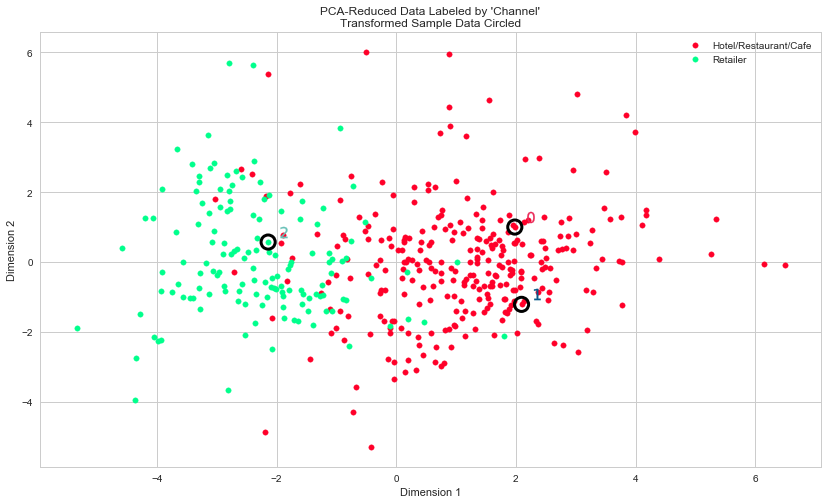

In [55]:
# Mostre os resultados do clustering baseado nos dados do 'Channel'
vs.channel_results(reduced_data, outliers_duplicated, pca_samples)

### Questão 12
- Quão bom é o algoritmo de clustering e o números de clusters que você escolheu comparado a essa distribuição subjacente de clientes de Hotel/Restaurante/Café a um cliente Varejista?
- Há segmentos de clientes que podem ser classificados puramente como 'Varejistas' ou 'Hotéis/Restaurantes/Cafés' nessa distribuição?
- Você consideraria essas classificações como consistentes comparada a sua definição de segmentação de clientes anterior?*

**Resposta:**

**Quão bom é o algoritmo de clustering e o números de clusters que você escolheu comparado a essa distribuição subjacente de clientes de Hotel/Restaurante/Café a um cliente Varejista?**
O número de cluster escolhido foi 2 o que é confirmando se visualizados o gráfico acima de *Channels*, tirando alguns dados que fogem um pouco da classificação anteior, o algoritmo conseguiu segmentar muito bem os dados.


**Há segmentos de clientes que podem ser classificados puramente como 'Varejistas' ou 'Hotéis/Restaurantes/Cafés' nessa distribuição?**
Sim, os clientes dos extremos são puramente 'Varejistas' ou 'Hotéis/Restaurantes/Cafés', apenas os pontos centrais não podem ser classificados assim.


**Você consideraria essas classificações como consistentes comparada a sua definição de segmentação de clientes anterior?**
Sim, as segmentações são parecidas e fazem sentido comparando os dados e o algoritmo trabalho bem na segmentação, salvo apenas alguns pontos no centro.


> **Nota**: Uma vez que você completou todas as implementações de código e respondeu todas as questões acima com êxito, você pode finalizar seu trabalho exportando um iPython Notebook como um documento HTML. Você pode fazer isso utilizando o menu acima e navegando até  
**File -> Download as -> HTML (.html)**. Inclua o documento finalizado junto com esse Notebook para o seu envio.